# A MODEL TO PREDICT CO2 EMISSIONS
Developing a machine learning model involves several steps. First, the data must be collected and pre-processed. This involves cleaning, normalizing, and formatting the data as needed. Next, the data must be split into training and test sets. The training set is used to train the model and the test set is used to evaluate the model's performance. After the data is split, an appropriate model must be chosen, and the model must be trained on the training set. Finally, the model must be evaluated on the test set and the parameters must be tuned as needed.

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_model = pd.read_csv("MY2010-2014 Fuel Consumption Ratings 5-cycle.csv")
df_model  # Imports and read in the csv file from the local computer using pandas library

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2010,ACURA,CSX,COMPACT,2,4.0,AS5,X,10.9,7.8,9.5,30,219
2,2010,ACURA,CSX,COMPACT,2,4.0,M5,X,10,7.6,8.9,32,205
3,2010,ACURA,CSX,COMPACT,2,4.0,M6,Z,11.6,8.1,10,28,230
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3,6.0,AS6,X,13.4,9.8,11.8,24,271
5356,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3,6.0,AS6,X,13.4,9.8,11.8,24,271
5358,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260


In [3]:
df_model.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2010,ACURA,CSX,COMPACT,2,4.0,AS5,X,10.9,7.8,9.5,30,219
2,2010,ACURA,CSX,COMPACT,2,4.0,M5,X,10,7.6,8.9,32,205
3,2010,ACURA,CSX,COMPACT,2,4.0,M6,Z,11.6,8.1,10,28,230
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304


In [4]:
df_model.describe().T # number of cylinders 

,count,mean,std,min,25%,50%,75%,max
CYLINDERS,5359.0,5.96212,1.872838,2.0,4.0,6.0,8.0,16.0


In [5]:
df_model.isnull().sum() # sums up and displays null values in the dataset

MODEL                0
MAKE                 1
MODEL.1              0
VEHICLE CLASS        1
ENGINE SIZE          0
CYLINDERS            1
TRANSMISSION         1
FUEL                 0
FUEL CONSUMPTION*    0
Unnamed: 9           0
Unnamed: 10          0
Unnamed: 11          0
CO2 EMISSIONS        0
dtype: int64

In [6]:
# To update the column headings as appropriate formatting
df_model.columns = ['MODEL YEAR', 'VEHICLE MAKE','VEHICLE MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION', 'FUEL CONSUMPTION HWY', 'FUEL CONSUMPTION COMB.', 'FUEL CONSUMPTION COMB. (mpg)', 'CO2 EMISSIONS']
df_model.head(10)

,MODEL YEAR,VEHICLE MAKE,VEHICLE MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB.,FUEL CONSUMPTION COMB. (mpg),CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2010,ACURA,CSX,COMPACT,2,4.0,AS5,X,10.9,7.8,9.5,30,219
2,2010,ACURA,CSX,COMPACT,2,4.0,M5,X,10,7.6,8.9,32,205
3,2010,ACURA,CSX,COMPACT,2,4.0,M6,Z,11.6,8.1,10,28,230
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
5,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24,274
6,2010,ACURA,RL AWD,MID-SIZE,3.7,6.0,AS5,Z,14.7,10.6,12.9,22,297
7,2010,ACURA,TL,MID-SIZE,3.5,6.0,AS5,Z,13.1,8.9,11.2,25,258
8,2010,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS5,Z,13.8,9.6,11.9,24,274
9,2010,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24,267


In [7]:
df_model.drop(labels = 0, axis = 0, inplace = True) # this removes the unwanted row (line 0) from the dataframe
df_model

,MODEL YEAR,VEHICLE MAKE,VEHICLE MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB.,FUEL CONSUMPTION COMB. (mpg),CO2 EMISSIONS
1,2010,ACURA,CSX,COMPACT,2,4.0,AS5,X,10.9,7.8,9.5,30,219
2,2010,ACURA,CSX,COMPACT,2,4.0,M5,X,10,7.6,8.9,32,205
3,2010,ACURA,CSX,COMPACT,2,4.0,M6,Z,11.6,8.1,10,28,230
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
5,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3,6.0,AS6,X,13.4,9.8,11.8,24,271
5356,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3,6.0,AS6,X,13.4,9.8,11.8,24,271
5358,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260


In [8]:
df_model.isnull().sum() # Checks for null value(s)

MODEL YEAR                      0
VEHICLE MAKE                    0
VEHICLE MODEL                   0
VEHICLE CLASS                   0
ENGINE SIZE                     0
CYLINDERS                       0
TRANSMISSION                    0
FUEL TYPE                       0
FUEL CONSUMPTION                0
FUEL CONSUMPTION HWY            0
FUEL CONSUMPTION COMB.          0
FUEL CONSUMPTION COMB. (mpg)    0
CO2 EMISSIONS                   0
dtype: int64

In [9]:
df_model.info() # Displays all details and errors to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MODEL YEAR                    5359 non-null   object 
 1   VEHICLE MAKE                  5359 non-null   object 
 2   VEHICLE MODEL                 5359 non-null   object 
 3   VEHICLE CLASS                 5359 non-null   object 
 4   ENGINE SIZE                   5359 non-null   object 
 5   CYLINDERS                     5359 non-null   float64
 6   TRANSMISSION                  5359 non-null   object 
 7   FUEL TYPE                     5359 non-null   object 
 8   FUEL CONSUMPTION              5359 non-null   object 
 9   FUEL CONSUMPTION HWY          5359 non-null   object 
 10  FUEL CONSUMPTION COMB.        5359 non-null   object 
 11  FUEL CONSUMPTION COMB. (mpg)  5359 non-null   object 
 12  CO2 EMISSIONS                 5359 non-null   object 
dtypes: 

The datatype errors is been corrected using the astype function for each case

In [10]:
df_model["MODEL YEAR"] = df_model["MODEL YEAR"].astype("int64")
df_model["ENGINE SIZE"] = df_model["ENGINE SIZE"].astype(float)
df_model["FUEL CONSUMPTION"] = df_model["FUEL CONSUMPTION"].astype(float)
df_model["FUEL CONSUMPTION HWY"] = df_model["FUEL CONSUMPTION HWY"].astype(float)
df_model["FUEL CONSUMPTION COMB."] = df_model["FUEL CONSUMPTION COMB."].astype(float)
df_model["FUEL CONSUMPTION COMB. (mpg)"] = df_model["FUEL CONSUMPTION COMB. (mpg)"].astype("int64")
df_model["CO2 EMISSIONS"] = df_model["CO2 EMISSIONS"].astype("int64")

In [11]:
df_model.info() # This verifies that there is no null and nan values; and the datatypes are in the right format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MODEL YEAR                    5359 non-null   int64  
 1   VEHICLE MAKE                  5359 non-null   object 
 2   VEHICLE MODEL                 5359 non-null   object 
 3   VEHICLE CLASS                 5359 non-null   object 
 4   ENGINE SIZE                   5359 non-null   float64
 5   CYLINDERS                     5359 non-null   float64
 6   TRANSMISSION                  5359 non-null   object 
 7   FUEL TYPE                     5359 non-null   object 
 8   FUEL CONSUMPTION              5359 non-null   float64
 9   FUEL CONSUMPTION HWY          5359 non-null   float64
 10  FUEL CONSUMPTION COMB.        5359 non-null   float64
 11  FUEL CONSUMPTION COMB. (mpg)  5359 non-null   int64  
 12  CO2 EMISSIONS                 5359 non-null   int64  
dtypes: 

<Figure size 720x480 with 0 Axes>

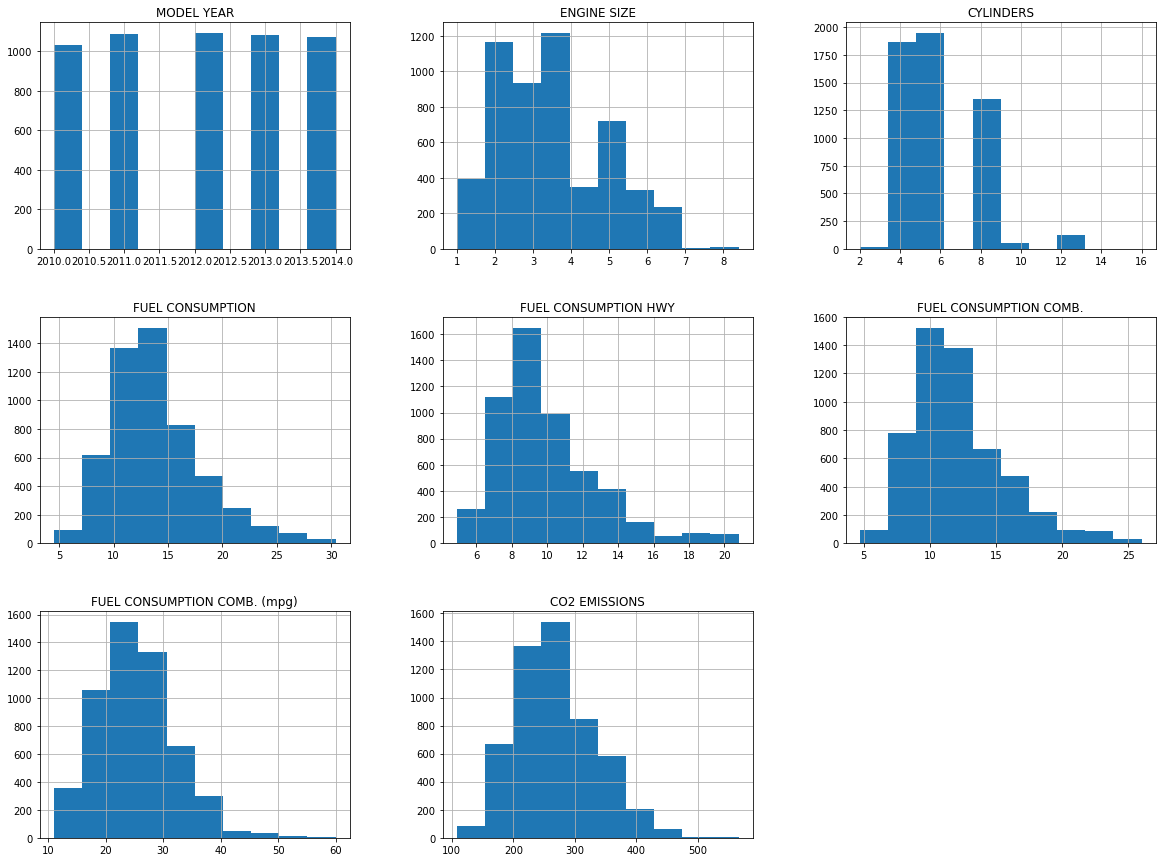

In [12]:
plt.figure(dpi = 120)
df_model.hist(figsize = (20, 15)) # These charts display all the numerical datatypes (int and float) and their quantities
plt.show()


In [13]:
df_model.describe().T # Description of the measure of central tendency in the dataframe

,count,mean,std,min,25%,50%,75%,max
MODEL YEAR,5359.0,2012.014742,1.404536,2010.0,2011.0,2012.0,2013.0,2014.0
ENGINE SIZE,5359.0,3.491901,1.390957,1.0,2.4,3.5,4.6,8.4
CYLINDERS,5359.0,5.962120,1.872838,2.0,4.0,6.0,8.0,16.0
FUEL CONSUMPTION,5359.0,13.902650,4.162894,4.5,11.0,13.2,16.0,30.4
FUEL CONSUMPTION HWY,5359.0,9.932208,2.807196,4.9,8.0,9.3,11.2,20.8
FUEL CONSUMPTION COMB.,5359.0,12.116328,3.524127,4.7,9.7,11.4,13.9,26.0
FUEL CONSUMPTION COMB. (mpg),5359.0,25.168875,6.956407,11.0,20.0,25.0,29.0,60.0
CO2 EMISSIONS,5359.0,267.660198,64.317040,108.0,221.0,260.0,305.0,566.0


In [14]:
categorical_df =  df_model.select_dtypes(include = "object") # A variable for object datatypes (strings) in the dataframe
categorical_df

,VEHICLE MAKE,VEHICLE MODEL,VEHICLE CLASS,TRANSMISSION,FUEL TYPE
1,ACURA,CSX,COMPACT,AS5,X
2,ACURA,CSX,COMPACT,M5,X
3,ACURA,CSX,COMPACT,M6,Z
4,ACURA,MDX AWD,SUV,AS6,Z
5,ACURA,RDX AWD TURBO,SUV,AS5,Z
...,...,...,...,...,...
5355,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5356,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5357,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
5358,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


In [15]:
numerical_df = df_model.select_dtypes(exclude = "object") # A variable created to contain all numerical columns & entries
numerical_df

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB.,FUEL CONSUMPTION COMB. (mpg),CO2 EMISSIONS
1,2010,2.0,4.0,10.9,7.8,9.5,30,219
2,2010,2.0,4.0,10.0,7.6,8.9,32,205
3,2010,2.0,4.0,11.6,8.1,10.0,28,230
4,2010,3.7,6.0,14.8,11.3,13.2,21,304
5,2010,2.3,4.0,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...
5355,2014,3.0,6.0,13.4,9.8,11.8,24,271
5356,2014,3.2,6.0,13.2,9.5,11.5,25,264
5357,2014,3.0,6.0,13.4,9.8,11.8,24,271
5358,2014,3.2,6.0,12.9,9.3,11.3,25,260


### DEVELOPING THE MACHINE LEARNING MODEL
Linear regression model

In [16]:
from sklearn.model_selection import train_test_split # sci-kit learn library to split train and test data
from sklearn.preprocessing import MinMaxScaler # to rescale the numerical data

In [17]:
x = numerical_df.drop("CO2 EMISSIONS", axis = 1) # Removes the CO2 EMISSION from the numerical data
y = numerical_df["CO2 EMISSIONS"] # creates a new variable for the CO2 EMISSION data only

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x, y = x_train, y_train # Splits the train data and test data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [18]:
x_train # the variable with allnumerical variables except CO2 emissions

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB.,FUEL CONSUMPTION COMB. (mpg)
2301,2012,3.7,5.0,14.9,11.0,13.1,22
1001,2010,2.4,5.0,12.0,8.5,10.4,27
4497,2014,3.6,6.0,14.8,9.9,12.6,22
3824,2013,3.6,6.0,14.8,11.8,13.4,21
2424,2012,6.4,8.0,16.8,10.4,13.9,20
...,...,...,...,...,...,...,...
3678,2013,4.3,6.0,16.7,13.4,15.2,19
4601,2014,3.6,6.0,16.8,10.3,13.9,20
3960,2013,5.5,8.0,15.2,10.4,13.0,22
2617,2012,6.0,8.0,22.7,15.0,19.2,15


In [19]:
y_train # This shows the CO2 EMISSIONS column as the y_train (being removed from the whole dataset)

2301    301
1001    239
4497    290
3824    308
2424    320
       ... 
3678    350
4601    222
3960    299
2617    442
1498    344
Name: CO2 EMISSIONS, Length: 3429, dtype: int64

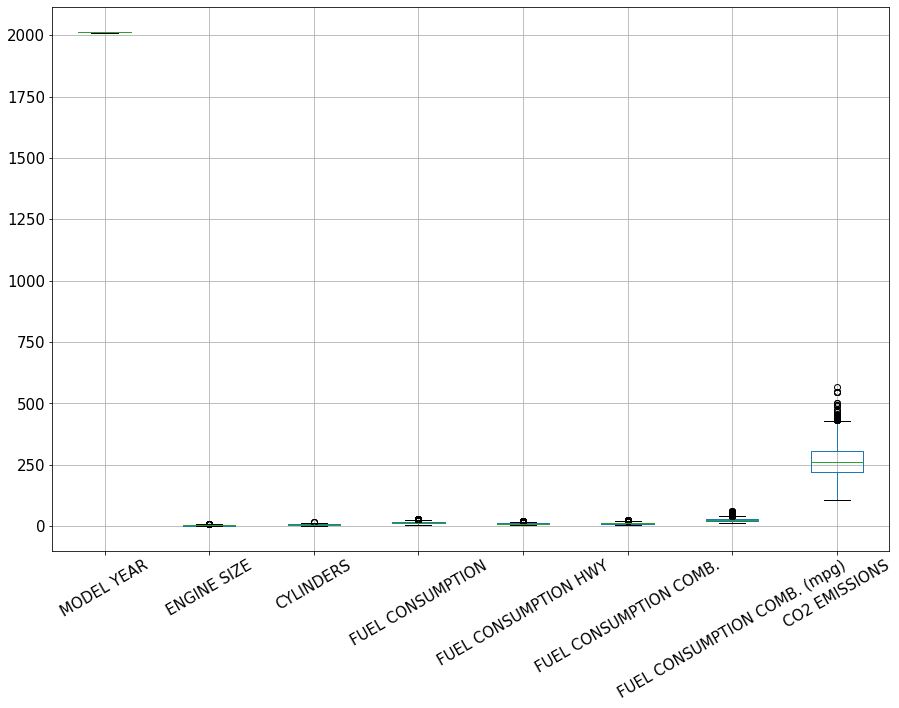

In [20]:
numerical_df.boxplot(figsize = (15,10), fontsize = 15, rot = 30) # shows the number of numerical variables
plt.show() # plot shows the count of each numerical entry


The plot above does not show the data extensively, so there is a need to rescale the numerical data for proper representation and analysis

In [21]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train) # To scale the train data
x_test_scaled = scaler.transform(x_test) # To scale the test data
x_val_scaled = scaler.transform(x_val) # To scale the validation data

In [22]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
X_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
X_val_scaled = pd.DataFrame(x_val_scaled, columns = x_val.columns)

### Simple Linear Regression Model
This is developed to predict a continuous target variable (CO2 EMISSIONS). The numerical variables are compared to the target variable one at a time. It works by fitting a linear model to a dataset by finding a line of best fit that minimizes the sum of squared errors.

In [23]:
# The shape of the ENGINE SIZE data 
# X_train_scaled['ENGINE SIZE'].shape 
# X_train_scaled['CYLINDERS'].shape

In [24]:
def reshapeVariable(variable): # This defined function reshapes every numeral data column
    X_train_scaled[variable].shape
    X_train_scaled_value = X_train_scaled[variable].to_numpy().reshape(-1,1)
    X_val_scaled_value = X_val_scaled[variable].to_numpy().reshape(-1,1)
    X_test_scaled_value = X_test_scaled[variable].to_numpy().reshape(-1,1)
    return X_train_scaled_value, X_test_scaled_value

In [25]:
from sklearn.linear_model import LinearRegression # importing the linear regression library
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # importing metrics for further anaysis and comparisons

In [26]:
model = LinearRegression() # fitting the model to a dataset using the LinearRegression class

In [27]:
# The model test report
def model_test(model,X_train_scaled,X_test_scaled):
    model.fit(X_train_scaled,y_train) #  fit the linear regression model to the data.
    basem_preds = model.predict(X_test_scaled)
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    print(f"The mean_absolute_error is: {mean_abs:.2f}")
    print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

train_value = reshapeVariable('ENGINE SIZE')[0]
test_value = reshapeVariable('ENGINE SIZE')[1]
model_test(model,train_value,test_value) # to train and test the model on the data

The mean_absolute_error is: 24.48
The root mean squared error is : 33.08
The coefficient of determination is: 0.73


In [28]:
train_value = reshapeVariable('CYLINDERS')[0]
test_value = reshapeVariable('CYLINDERS')[1]
model_test(model,train_value,test_value)

The mean_absolute_error is: 27.11
The root mean squared error is : 34.81
The coefficient of determination is: 0.71


In [29]:
train_value = reshapeVariable('FUEL CONSUMPTION')[0]
test_value = reshapeVariable('FUEL CONSUMPTION')[1]
model_test(model,train_value,test_value)

The mean_absolute_error is: 20.31
The root mean squared error is : 28.74
The coefficient of determination is: 0.80


In [30]:
train_value = reshapeVariable('FUEL CONSUMPTION HWY')[0]
test_value = reshapeVariable('FUEL CONSUMPTION HWY')[1]
model_test(model,train_value,test_value)

The mean_absolute_error is: 24.51
The root mean squared error is : 33.19
The coefficient of determination is: 0.73


In [31]:
train_value = reshapeVariable('FUEL CONSUMPTION COMB.')[0]
test_value = reshapeVariable('FUEL CONSUMPTION COMB.')[1]
model_test(model,train_value,test_value)

The mean_absolute_error is: 21.02
The root mean squared error is : 29.56
The coefficient of determination is: 0.79


In [32]:
train_value = reshapeVariable('FUEL CONSUMPTION COMB. (mpg)')[0]
test_value = reshapeVariable('FUEL CONSUMPTION COMB. (mpg)')[1]
model_test(model,train_value,test_value)

The mean_absolute_error is: 18.14
The root mean squared error is : 28.33
The coefficient of determination is: 0.80


### EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'A HEATMAP SHOWING THE CORRELATION BETWEEN THE NUMERICAL DATAFRAME VALUES')

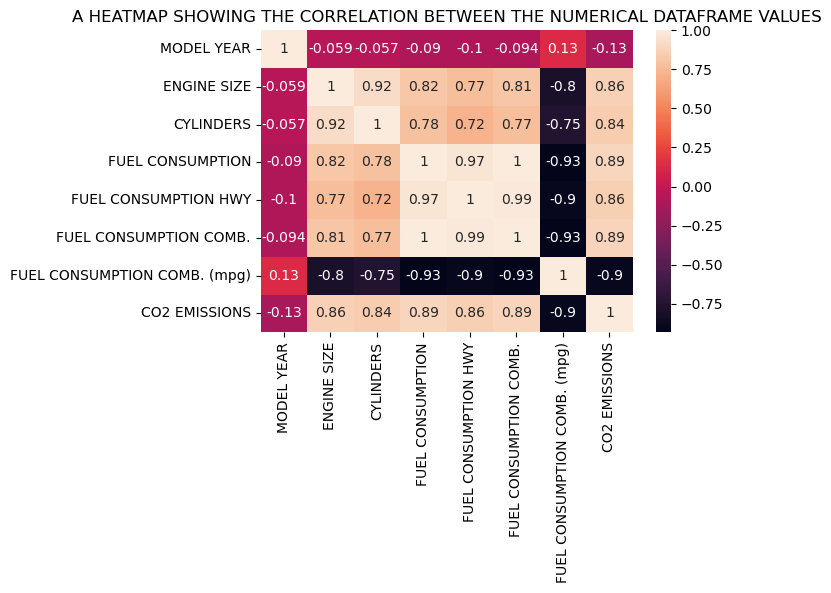

In [33]:
plt.figure(dpi = 100) # A plot to show correlation between all numerical attributes
sns.heatmap(numerical_df.corr(), annot = True)
plt.title("A HEATMAP SHOWING THE CORRELATION BETWEEN THE NUMERICAL DATAFRAME VALUES")

In [34]:
numerical_df.nunique() # Number of uniques values in the numerical data

MODEL YEAR                        5
ENGINE SIZE                      54
CYLINDERS                         9
FUEL CONSUMPTION                201
FUEL CONSUMPTION HWY            139
FUEL CONSUMPTION COMB.          183
FUEL CONSUMPTION COMB. (mpg)     44
CO2 EMISSIONS                   220
dtype: int64

### MULTIPLE LINEAR REGRESSION MODEL

In [35]:
def model_test(model): # have multiple independent variables as ENGINE SIZE AND FUEL CONSUMPTION COMB
    model.fit(X_train_scaled[['ENGINE SIZE', 'FUEL CONSUMPTION COMB. (mpg)']],y_train)
    basem_preds = model.predict(X_test_scaled[['ENGINE SIZE','FUEL CONSUMPTION COMB. (mpg)']])
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    print(f"The mean_absolute_error is: {mean_abs:.2f}")
    print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")
model_test(model) 


The mean_absolute_error is: 15.83
The root mean squared error is : 24.21
The coefficient of determination is: 0.86


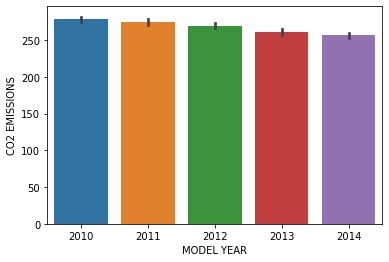

In [36]:
sns.barplot(data = numerical_df, x = "MODEL YEAR", y = "CO2 EMISSIONS")
plt.show()


### CLASSIFICATION

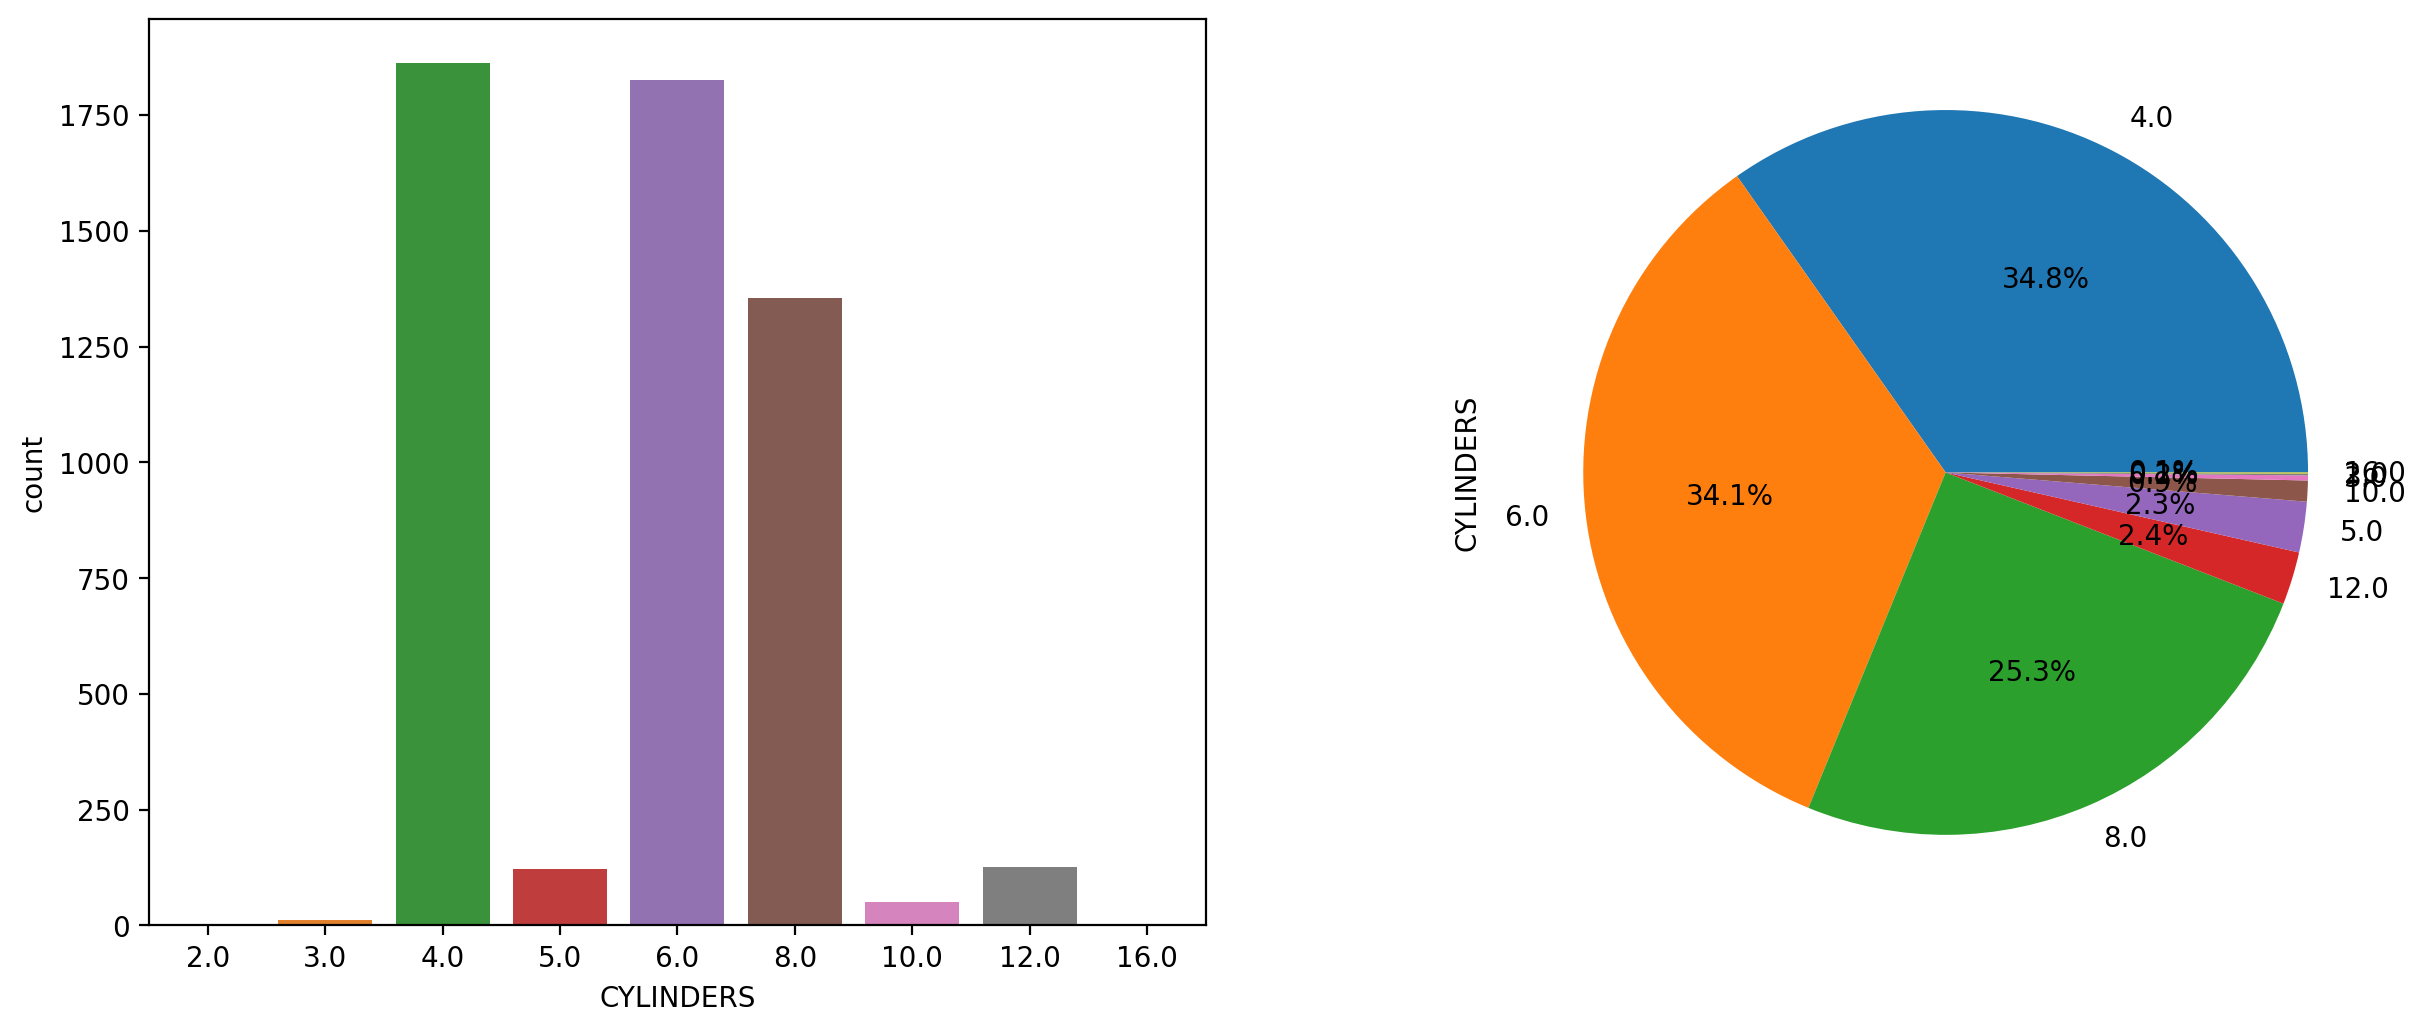

In [37]:

fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) 
a = sns.countplot(x = 'CYLINDERS', data = numerical_df, ax=ax_position[0]) 
a = numerical_df['CYLINDERS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) 


In [38]:
x = numerical_df.drop('CYLINDERS', axis = 1)
y = numerical_df['CYLINDERS']

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve, roc_auc_score)


In [44]:
def remove_possible_one(df,target):  #
    model_copy = df.copy()
    vc  = df_model[target].value_counts()
    b = vc[vc <= 2].index

    for element in b:
        indexd = model_copy[model_copy[target] == element].index
        model_copy.drop(indexd,inplace = True)
    return model_copy

In [45]:
def classify_df(df,target):
    data = remove_possible_one(df,target)
    X = data.drop(target, axis = 1)
    y = data[target]
    
    object_columns = [x for x in X.columns if X[x].dtype == object]
    print(object_columns)

    ohe = OneHotEncoder()
    ohe_data=ohe.fit_transform(X[object_columns]).toarray()
    feature_labels = ohe.get_feature_names_out()

    df_ohe = pd.DataFrame(ohe_data, columns = feature_labels, index = X[object_columns].index) 
    print(df_ohe)
    new_df_ohe = pd.concat([X,df_ohe], axis = 1)
    new_df_ohe.drop(object_columns, axis = 1,inplace = True)

    X = new_df_ohe

In [46]:
classify_df(df_model,"ENGINE SIZE")

['VEHICLE MAKE', 'VEHICLE MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE']
      VEHICLE MAKE_ACURA  VEHICLE MAKE_ALFA ROMEO  VEHICLE MAKE_ASTON MARTIN  \
1                    1.0                      0.0                        0.0   
2                    1.0                      0.0                        0.0   
3                    1.0                      0.0                        0.0   
4                    1.0                      0.0                        0.0   
5                    1.0                      0.0                        0.0   
...                  ...                      ...                        ...   
5355                 0.0                      0.0                        0.0   
5356                 0.0                      0.0                        0.0   
5357                 0.0                      0.0                        0.0   
5358                 0.0                      0.0                        0.0   
5359                 0.0                

#### APPLYING SMOTE

In [47]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate, KFold, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 

#### Splitting and scaling the dataset

In [48]:
def classification(df,target):
    data = remove_possible_one(df,target)
    X = data.drop(target, axis = 1)
    y = data[target]
   
    object_columns = [x for x in X.columns if X[x].dtype == object]
   
    ohe = OneHotEncoder()
    ohe_data = ohe.fit_transform(X[object_columns]).toarray()
    feature_labels = ohe.get_feature_names_out()

    df_ohe = pd.DataFrame(ohe_data, columns = feature_labels, index = X[object_columns].index)

    new_df_ohe = pd.concat([X,df_ohe], axis = 1)
    new_df_ohe.drop(object_columns, axis = 1,inplace = True)

    X = new_df_ohe

    sm = SMOTE(random_state=42, k_neighbors = 2)   # Smote the dataset
    X_res, y_res = sm.fit_resample(X, y)   #fitting the dataset
    X, y = X_res, y_res
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) #train and test the dataset
    X_variables,y_variables=X_train,y_train
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

    scaler = MinMaxScaler()  #rescaling the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # converts the scaled data to panda dataframe
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

    
    model = KNeighborsClassifier()  #using the kNeighbors classifier
    model.fit(X_train_scaled,y_train)
    basem_preds = model.predict(X_test_scaled)
   
    print(classification_report(y_test,basem_preds))

In [49]:
classification(df_model, "TRANSMISSION")  #classify the transmission variable 

              precision    recall  f1-score   support

          A4       0.79      0.84      0.81       190
          A5       0.91      0.86      0.88       232
          A6       0.79      0.59      0.67       210
          A7       0.90      0.98      0.94       216
          A8       0.88      0.98      0.93       229
          A9       1.00      1.00      1.00       215
         AM5       0.99      1.00      1.00       218
         AM6       0.96      1.00      0.98       197
         AM7       0.91      0.96      0.94       226
         AS4       0.92      1.00      0.95       206
         AS5       0.79      0.93      0.86       195
         AS6       0.66      0.54      0.59       223
         AS7       0.89      0.91      0.90       232
         AS8       0.90      1.00      0.95       211
          AV       0.86      0.92      0.89       213
         AV6       0.97      1.00      0.99       205
         AV7       0.97      1.00      0.99       207
         AV8       1.00    

In [50]:
classification(df_model, "VEHICLE MAKE") # vehicle make model

               precision    recall  f1-score   support

        ACURA       1.00      1.00      1.00       110
 ASTON MARTIN       0.99      1.00      1.00       109
         AUDI       0.94      0.93      0.94       122
      BENTLEY       1.00      1.00      1.00       101
          BMW       0.99      0.88      0.93       108
      BUGATTI       1.00      1.00      1.00       110
        BUICK       0.94      1.00      0.97       101
     CADILLAC       0.92      1.00      0.96       119
    CHEVROLET       0.97      0.52      0.67       108
     CHRYSLER       0.92      0.99      0.95       123
        DODGE       0.93      0.88      0.90       106
      FERRARI       1.00      1.00      1.00       104
         FIAT       1.00      1.00      1.00       100
         FORD       0.95      0.79      0.86       125
          GMC       0.79      0.93      0.85        98
        HONDA       0.98      0.96      0.97       112
       HUMMER       1.00      1.00      1.00        89
      HYU

In [51]:
classification(df_model, "VEHICLE CLASS") # vehicle class model

                          precision    recall  f1-score   support

                 COMPACT       0.87      0.54      0.67       152
               FULL-SIZE       0.82      0.92      0.86       149
                MID-SIZE       0.89      0.70      0.79       142
             MINICOMPACT       0.96      0.99      0.98       173
                 MINIVAN       0.90      1.00      0.95       150
    PICKUP TRUCK - SMALL       0.98      1.00      0.99       133
 PICKUP TRUCK - STANDARD       0.96      0.99      0.97       173
 SPECIAL PURPOSE VEHICLE       0.97      1.00      0.99       146
STATION WAGON - MID-SIZE       0.84      1.00      0.91       163
   STATION WAGON - SMALL       0.79      0.99      0.88       149
              SUBCOMPACT       0.86      0.88      0.87       155
                     SUV       0.73      0.30      0.43       162
             SUV - SMALL       0.76      0.89      0.82       153
          SUV - STANDARD       0.76      0.89      0.82       139
         

In [52]:
classification(df_model, "VEHICLE MODEL") # vehicle model model

C:\Users\Ajibola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajibola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                    precision    recall  f1-score   support

                    128i CABRIOLET       0.25      0.43      0.32         7
                        128i COUPE       0.07      0.17      0.10         6
                    135i CABRIOLET       0.10      0.25      0.14         4
                        135i COUPE       1.00      0.30      0.46        10
              1500 (FuelSaver MDS)       0.33      0.14      0.20         7
          1500 4X4 (FuelSaver MDS)       0.25      0.50      0.33         4
                          1500 FFV       1.00      0.43      0.60         7
                      1500 FFV 4X4       0.43      1.00      0.60         3
                   200 CONVERTIBLE       0.86      1.00      0.92         6
               200 CONVERTIBLE FFV       0.88      0.88      0.88         8
                         200 SEDAN       1.00      1.00      1.00         4
                     200 SEDAN FFV       1.00      0.86      0.92         7
           

C:\Users\Ajibola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
classification(df_model, "FUEL TYPE") # fuel type model

              precision    recall  f1-score   support

           D       0.94      1.00      0.97       534
           E       0.80      1.00      0.89       526
           X       0.96      0.76      0.85       520
           Z       0.96      0.87      0.91       551

    accuracy                           0.91      2131
   macro avg       0.92      0.91      0.91      2131
weighted avg       0.92      0.91      0.91      2131



### MODEL VALIDATION

In [54]:
def validate_model(df,target):
    data = remove_possible_one(df,target)
    X = data.drop(target, axis = 1)
    y = data[target]
   
    object_columns = [x for x in X.columns if X[x].dtype == object]
   
    ohe = OneHotEncoder()
    ohe_data = ohe.fit_transform(X[object_columns]).toarray()
    feature_labels = ohe.get_feature_names_out()

    df_ohe = pd.DataFrame(ohe_data, columns = feature_labels, index = X[object_columns].index)

    new_df_ohe = pd.concat([X,df_ohe], axis = 1)
    new_df_ohe.drop(object_columns, axis = 1,inplace = True)

    X = new_df_ohe

    sm = SMOTE(random_state=42, k_neighbors = 2)
    X_res, y_res = sm.fit_resample(X, y)
    X, y = X_res, y_res
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    X_variables,y_variables=X_train,y_train
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

    model = KNeighborsClassifier()
    model.fit(X_train_scaled,y_train)

    kfold = KFold(n_splits=5) 
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
    print(cv_result.mean()) 

In [55]:
validate_model(df_model,"VEHICLE MAKE") #validation model for vehicle make

0.8870167300147294


In [56]:
validate_model(df_model,"VEHICLE MODEL") # validation model for vehicle model

0.7354941855269664


In [57]:
validate_model(df_model,"VEHICLE CLASS") # validation model for vehicle class

0.7961498223441218


In [58]:
validate_model(df_model,"FUEL TYPE") # validation model for fuel type

0.9354535817052856


In [59]:
validate_model(df_model,"TRANSMISSION") # validation model for transmission

0.8897264705207262


CLUSTERING